# Bike Sales in Europe

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\MULYADI\Data Analysis Bootcamp\dataset\Sales.csv")

In [6]:
# setting display format
#pd.set_option("dosplay.fload_format", lambda x: "%.2f" % x)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [7]:
# Dtype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [8]:
# Good data
df.isnull().sum() 

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [9]:
df.nunique().sort_values(ascending=False)

Date                1884
Revenue             1876
Profit              1256
Cost                 360
Product              130
Customer_Age          70
State                 53
Unit_Price            36
Unit_Cost             34
Order_Quantity        32
Day                   31
Sub_Category          17
Month                 12
Year                   6
Country                6
Age_Group              4
Product_Category       3
Customer_Gender        2
dtype: int64

In [10]:
#duplicated check = count 1000 duplicated in data
#df[df.duplicated()].count()
#df.duplicated().sum() 
df.drop_duplicates(inplace=True)

In [11]:
# check statistic
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.00,112036.00,112036.00,112036.00,112036.00,112036.00,112036.00,112036.00,112036.00
mean,15.67,2014.40,35.92,11.90,267.82,453.85,286.04,471.10,757.14
std,8.78,1.27,11.02,9.56,550.22,922.75,454.85,886.97,1312.06
min,1.00,2011.00,17.00,1.00,1.00,2.00,-30.00,1.00,2.00
25%,8.00,2013.00,28.00,2.00,2.00,5.00,29.00,28.00,64.00
50%,16.00,2014.00,35.00,10.00,9.00,25.00,103.00,112.00,226.00
75%,23.00,2016.00,43.00,20.00,42.00,70.00,360.00,442.00,806.00
max,31.00,2016.00,87.00,32.00,2171.00,3578.00,15096.00,42978.00,58074.00


In [12]:
df.sort_values("Profit", ascending=False).head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069
57273,2011-01-15,15,January,2011,72,Seniors (64+),F,United States,California,Bikes,Mountain Bikes,"Mountain-100 Black, 48",4,1898,3375,5638,7592,13230
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169
70699,2011-07-17,17,July,2011,30,Young Adults (25-34),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3578,5485,8684,14169
68671,2011-07-05,5,July,2011,26,Young Adults (25-34),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 56",4,2171,3578,5485,8684,14169
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169
59919,2011-03-20,20,March,2011,29,Young Adults (25-34),F,Germany,Bayern,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5485,8684,14169
70597,2011-05-12,12,May,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169


In [13]:
# corrolation check
df_corr = df.corr(numeric_only=True)

In [103]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

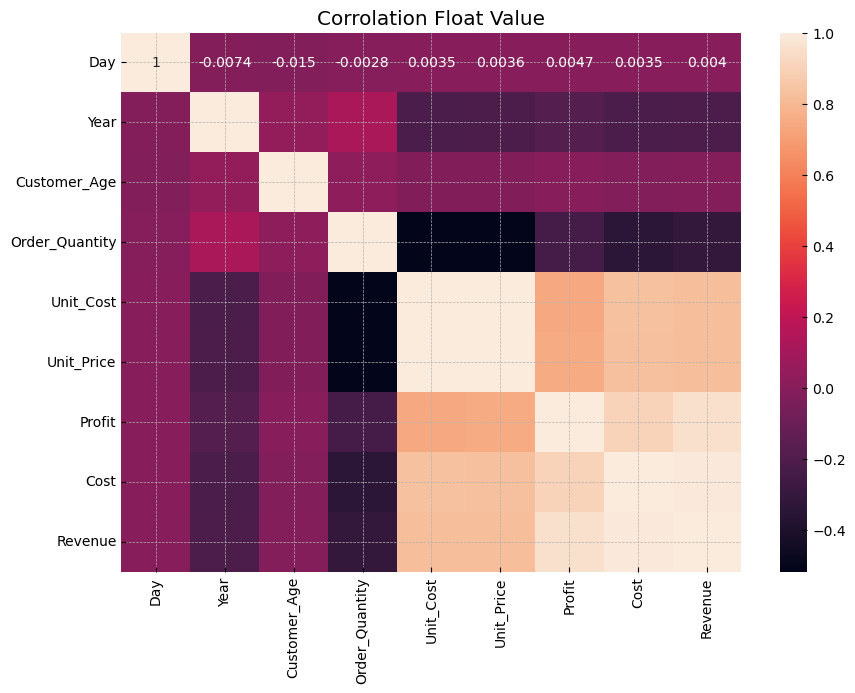

In [109]:
# corrolation 
sns.heatmap(df_corr, annot=True)

#plt.rcParams["figure.figsize"]=(10,7)
plt.title(label="Corrolation Float Value")
plt.style.use('seaborn-v0_8-muted')
plt.show()

In [17]:
df.Year.unique()

array([2013, 2015, 2014, 2016, 2012, 2011], dtype=int64)

In [18]:
# bike sales per year 
df.Year.value_counts()

Year
2016    29128
2014    29122
2015    24227
2013    24224
2011     2671
2012     2664
Name: count, dtype: int64

In [19]:
df.Country.unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [20]:
# bike sales per country
df.Country.value_counts(ascending=True)

Country
France            10920
Germany           11027
United Kingdom    13486
Canada            14027
Australia         23736
United States     38840
Name: count, dtype: int64

In [27]:
bike_sales_country = (df.filter(items=["Country","Customer_Age","Order_Quantity","Unit_Cost","Unit_Price","Profit","Cost","Revenue"]).
                     groupby(by="Country").
                     mean().sort_values("Profit",ascending=False).
                     transpose())

In [28]:
bike_sales_country

Country,United Kingdom,Germany,Australia,United States,Canada,France
Customer_Age,35.56,34.88,34.38,37.39,36.24,35.11
Order_Quantity,11.55,11.31,11.01,12.20,13.56,11.71
Unit_Cost,269.64,302.11,364.82,238.97,134.66,293.77
Unit_Price,456.06,510.06,613.44,408.68,230.45,495.13
Profit,325.08,303.80,283.98,283.15,263.92,263.01
Cost,459.12,508.45,609.03,432.01,299.72,507.57
Revenue,784.19,812.25,893.01,715.17,563.64,770.58


array([[<Axes: title={'center': 'United Kingdom'}>,
        <Axes: title={'center': 'Germany'}>,
        <Axes: title={'center': 'Australia'}>],
       [<Axes: title={'center': 'United States'}>,
        <Axes: title={'center': 'Canada'}>,
        <Axes: title={'center': 'France'}>]], dtype=object)

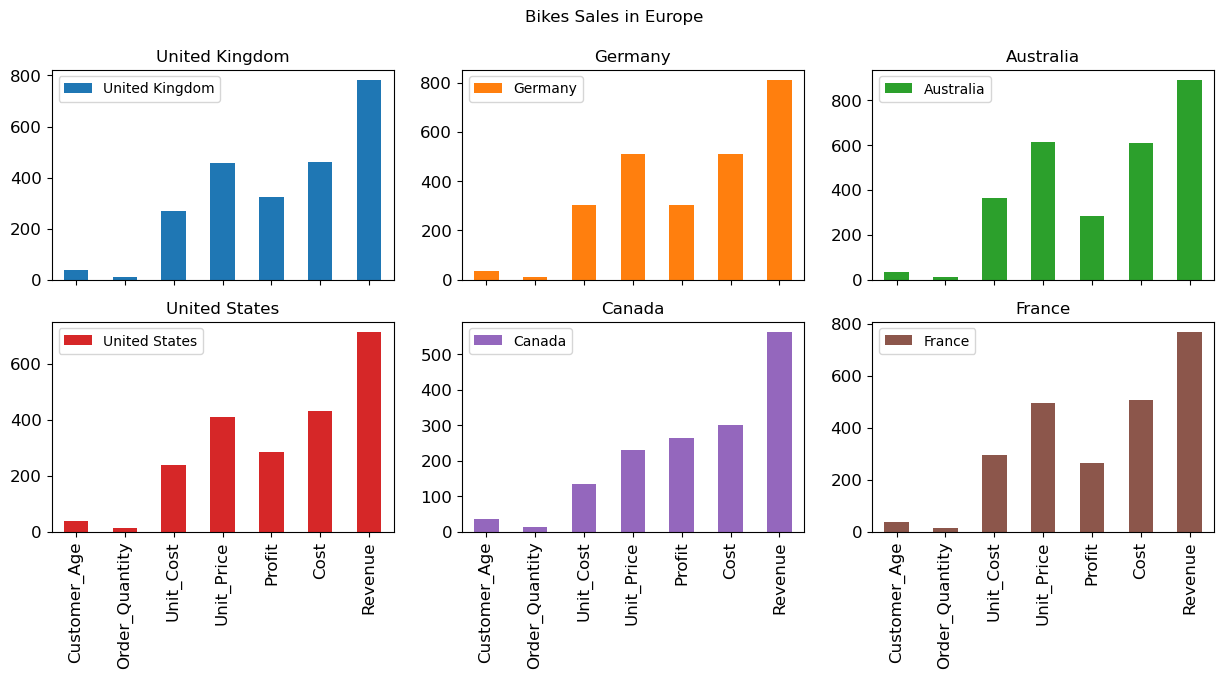

In [100]:
bike_sales_country.plot(kind="bar",figsize=(15,6),subplots=True,layout=(2,3),legend=True,fontsize=12,
                       title="Bikes Sales in Europe")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int64 
 

In [87]:
bike_sales_US = (df[df.filter(items=["Year","Country","Profit"])["Country"].
                 str.contains("United States")].
                 filter(items=(["Year","Profit"])).
                 groupby(by="Year").sum())

<Axes: title={'center': 'United Stated Profit Sales in Year'}, xlabel='Year'>

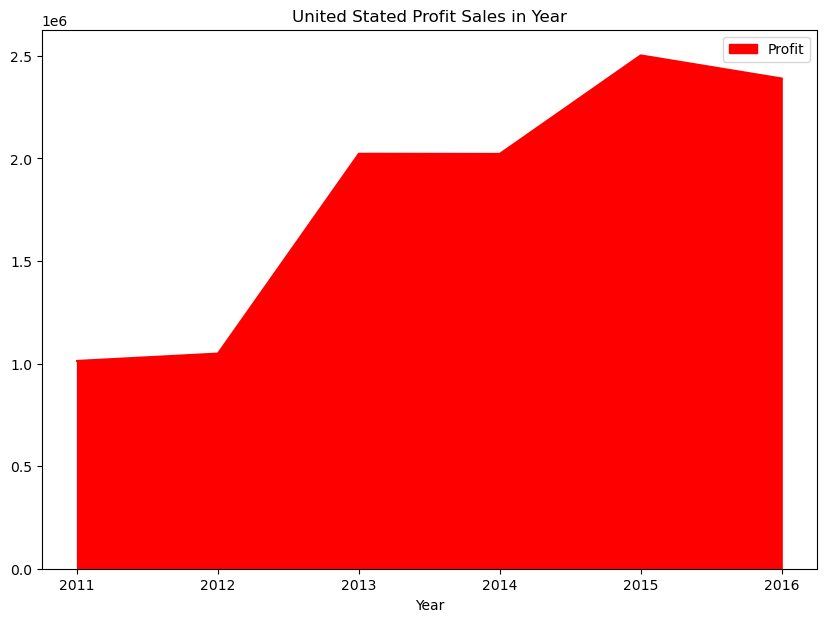

In [99]:
bike_sales_US.plot(kind="area",color="red",title="United Stated Profit Sales in Year")

<Axes: title={'center': 'Country VS Profit'}, xlabel='Country'>

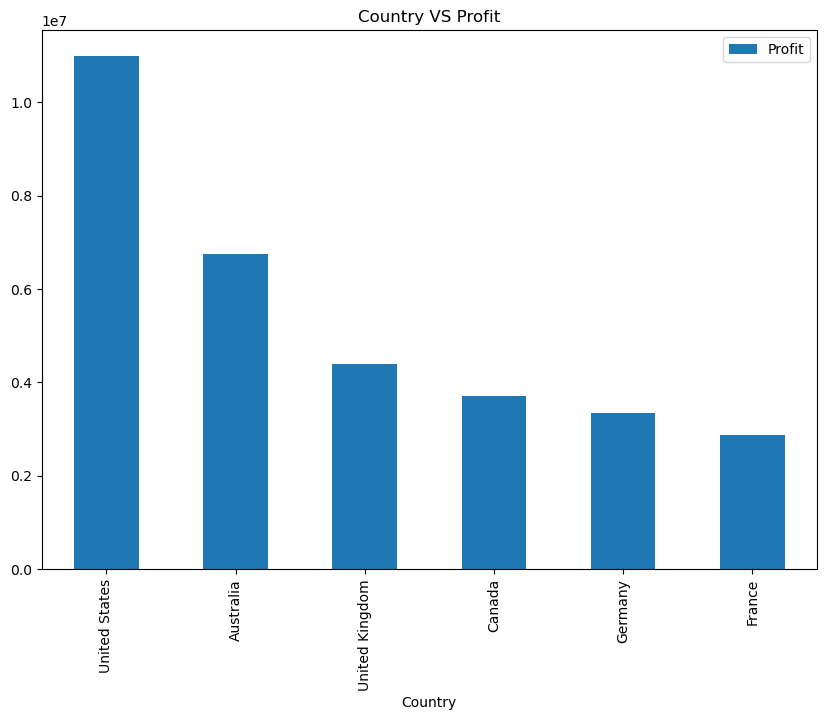

In [95]:
(df[["Country","Profit"]].groupby("Country").sum().sort_values("Profit",ascending=False).
plot(kind="bar",title=("Country VS Profit")))

In [31]:
df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [135]:
df.select_dtypes(include="object")

,Date,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
0,2013-11-26,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike
1,2015-11-26,November,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike
2,2014-03-23,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
3,2016-03-23,March,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
4,2014-05-15,May,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike
...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,April,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S"
113032,2014-04-02,April,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M"
113033,2016-04-02,April,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M"
113034,2014-03-04,March,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L"


In [137]:
df.select_dtypes(include="number")

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,2013,19,8,45,120,590,360,950
1,26,2015,19,8,45,120,590,360,950
2,23,2014,49,23,45,120,1366,1035,2401
3,23,2016,49,20,45,120,1188,900,2088
4,15,2014,47,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...
113031,12,2016,41,3,24,64,112,72,184
113032,2,2014,18,22,24,64,655,528,1183
113033,2,2016,18,22,24,64,655,528,1183
113034,4,2014,37,24,24,64,684,576,1260


In [133]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

# Continue 